In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import train and test csv
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

df.head(5)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [3]:
df.shape

(75757, 64)

In [4]:
test.shape

(9705, 63)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [6]:
df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [7]:
df.dtypes

Year_Factor                    int64
State_Factor                  object
building_class                object
facility_type                 object
floor_area                   float64
                              ...   
direction_peak_wind_speed    float64
max_wind_speed               float64
days_with_fog                float64
site_eui                     float64
id                             int64
Length: 64, dtype: object

In [8]:
df.isnull().sum()

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
id                               0
Length: 64, dtype: int64

# Data Visualizations

In [9]:
plt.style.use('seaborn')

<AxesSubplot:>

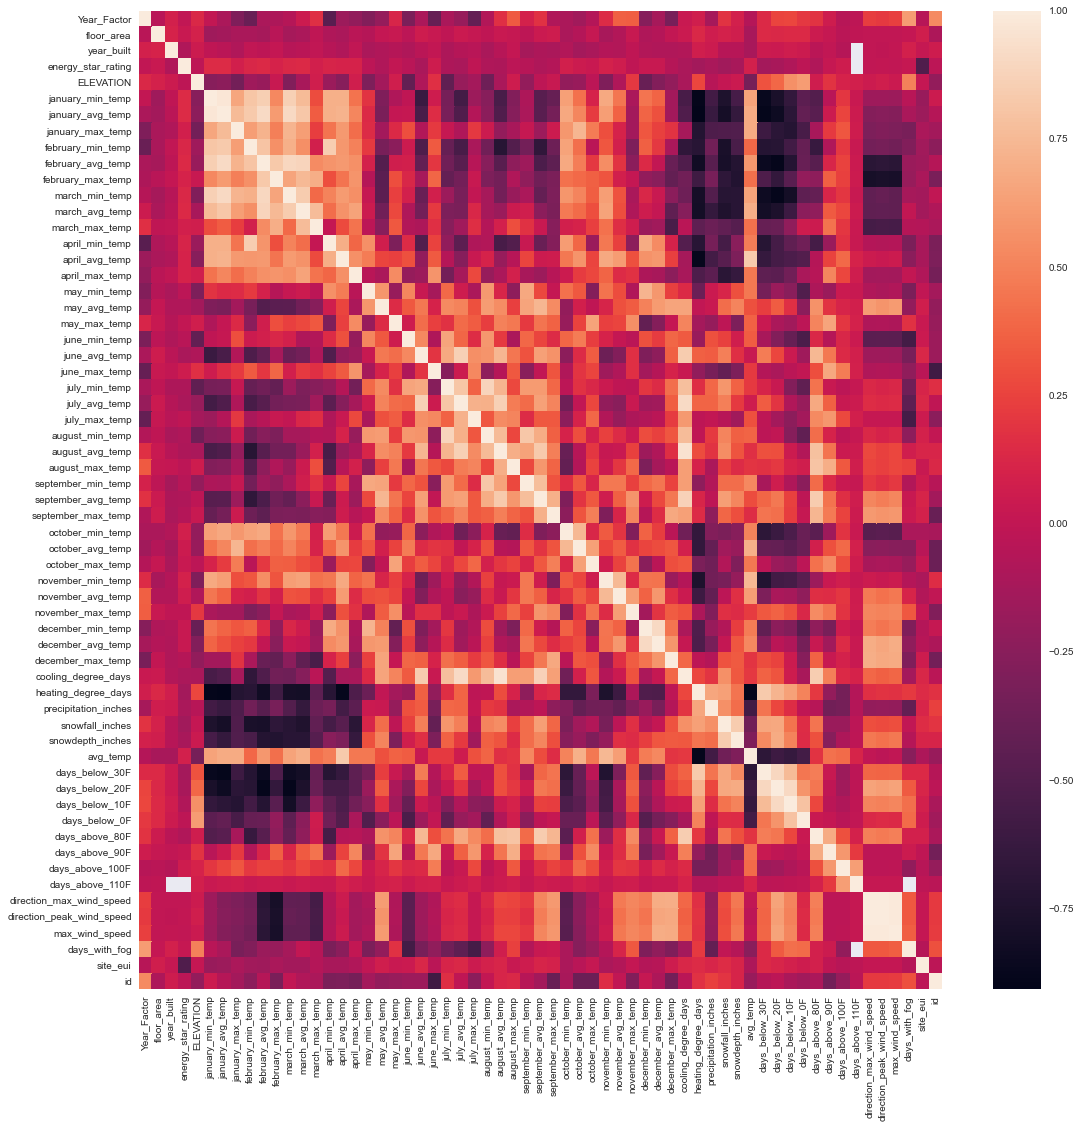

In [10]:
#Correlation
plt.figure(figsize=(18,18))
corr = df.corr()

sns.heatmap(corr,
           xticklabels=corr.columns,
           yticklabels=corr.columns)

Text(0, 0.5, 'Year Built')

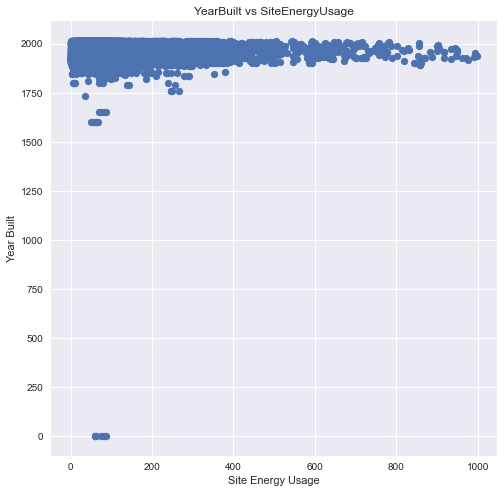

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(df['site_eui'], df['year_built'])
plt.title('YearBuilt vs SiteEnergyUsage')
plt.xlabel('Site Energy Usage')
plt.ylabel('Year Built')

Text(0, 0.5, 'Energy Usage')

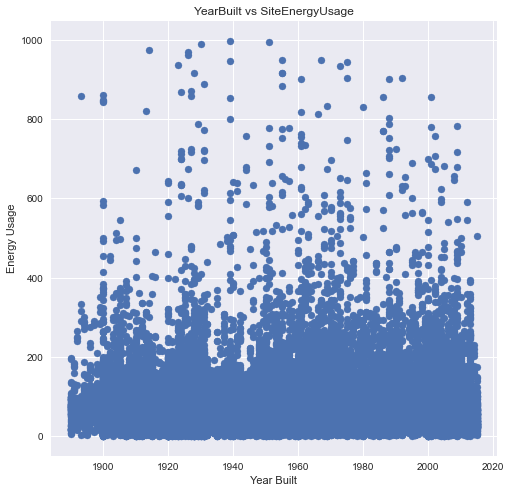

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(df.loc[(df.year_built >= 1890)]['year_built'],df.loc[(df.year_built >= 1890)]['site_eui'])
plt.title('YearBuilt vs SiteEnergyUsage')
plt.xlabel('Year Built')
plt.ylabel('Energy Usage')

([<matplotlib.patches.Wedge at 0x26f865a97c0>,
 [Text(-0.2566889140624542, 1.069631152032063, 'Commercial'),
  Text(0.25668881391635645, -1.069631176065009, 'Residential')],
 [Text(-0.1400121349431568, 0.5834351738356707, '57.50'),
  Text(0.1400120803180126, -0.5834351869445503, '42.50')])

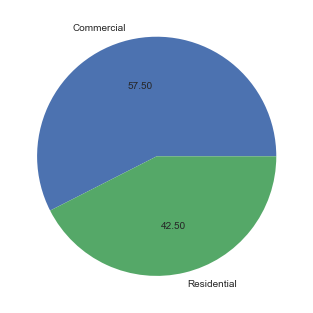

In [13]:
label = ['Commercial','Residential']
plt.pie(df['building_class'].value_counts(), labels=label, autopct = '%.2f')

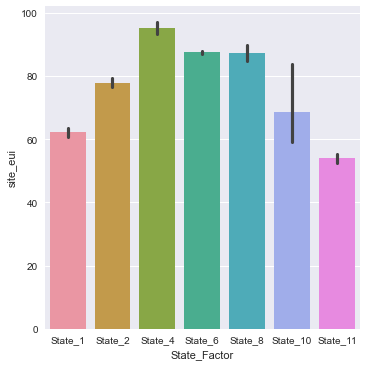

In [14]:
sns.catplot(x="State_Factor", y="site_eui", kind="bar", data=df)

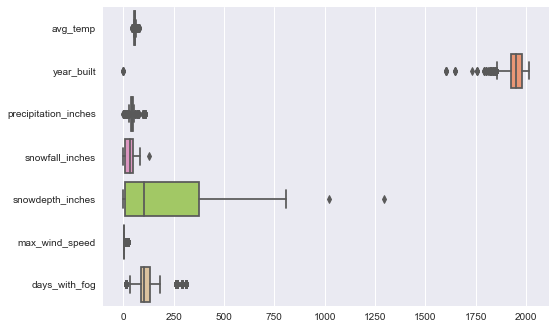

In [15]:
a=df[['avg_temp','year_built','precipitation_inches','snowfall_inches','snowdepth_inches','max_wind_speed','days_with_fog']]
ax = sns.boxplot(data=a, orient="h", palette="Set2")

Text(0.5, 1.0, 'Line Graph Showing Trend of Site Energy Usage')

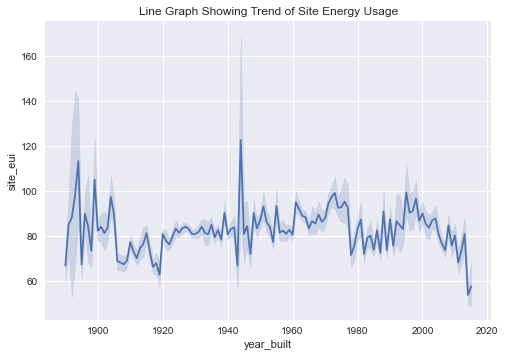

In [16]:
year= df[df['year_built']>=1890]
sns.lineplot(x='year_built',y='site_eui', data=year)
plt.title('Line Graph Showing Trend of Site Energy Usage')

# Preparing the data

In [17]:
#Handling the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   object 
 2   building_class             9705 non-null   object 
 3   facility_type              9705 non-null   object 
 4   floor_area                 9705 non-null   float64
 5   year_built                 9613 non-null   float64
 6   energy_star_rating         7451 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

In [19]:
for label, content in df.items():
    if pd.isnull(content).sum():
        df[label] = content.fillna(content.median())
        
        
        
for label, content in test.items():
    if pd.isnull(content).sum():
        test[label] = content.fillna(content.median())

In [20]:
df.isna().sum().any()

False

In [21]:
#convert strings to categories
cat = df.select_dtypes(include=object)
cat1 = cat.astype('category')
#convert cat to numeric
cat_columns = cat1.select_dtypes(['category']).columns
cat1[cat_columns] = cat1[cat_columns].apply(lambda x: x.cat.codes)

In [22]:
cat1.head(20)

,State_Factor,building_class,facility_type
0,0,0,13
1,0,0,55
2,0,0,48
3,0,0,6
4,0,0,56
5,0,0,58
6,0,0,56
7,0,0,56
8,0,0,32
9,0,0,32


In [23]:
cat1.shape

(75757, 3)

In [24]:
df.drop(['facility_type','State_Factor','building_class'],axis=1, inplace=True)

In [25]:
new_df = pd.concat([df, cat1], axis=1, join="inner")
new_df.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,State_Factor,building_class,facility_type
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,...,0,1.0,1.0,1.0,104.0,248.682615,0,0,0,13
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,...,0,1.0,1.0,1.0,12.0,26.500150,1,0,0,55
2,1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,...,0,1.0,1.0,1.0,12.0,24.693619,2,0,0,48
3,1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,...,0,1.0,1.0,1.0,12.0,48.406926,3,0,0,6
4,1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,...,0,1.0,1.0,1.0,104.0,3.899395,4,0,0,56


In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   floor_area                 75757 non-null  float64
 2   year_built                 75757 non-null  float64
 3   energy_star_rating         75757 non-null  float64
 4   ELEVATION                  75757 non-null  float64
 5   january_min_temp           75757 non-null  int64  
 6   january_avg_temp           75757 non-null  float64
 7   january_max_temp           75757 non-null  int64  
 8   february_min_temp          75757 non-null  int64  
 9   february_avg_temp          75757 non-null  float64
 10  february_max_temp          75757 non-null  int64  
 11  march_min_temp             75757 non-null  int64  
 12  march_avg_temp             75757 non-null  float64
 13  march_max_temp             75757 non-null  int

In [27]:
#CONVERT OBJECTS TO NUMERIC IN TEST DATAFRAME
# Turn categorical variables into numbers and fill missing
for label, content in test.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        #df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        test[label] = pd.Categorical(content).codes+1

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   int8   
 2   building_class             9705 non-null   int8   
 3   facility_type              9705 non-null   int8   
 4   floor_area                 9705 non-null   float64
 5   year_built                 9705 non-null   float64
 6   energy_star_rating         9705 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

In [29]:
#remove outliers
from scipy import stats
z = np.abs(stats.zscore(new_df))
print(z)

[[2.2887604  0.42427229 0.2807251  ... 2.73502847 1.16308853 1.11048095]
 [2.2887604  0.43753519 0.07444755 ... 2.73502847 1.16308853 2.49611589]
 [2.2887604  0.46194034 0.03483634 ... 2.73502847 1.16308853 1.89501642]
 ...
 [1.10929044 0.55863224 0.96374942 ... 1.4443112  1.16308853 2.05506583]
 [1.10929044 0.4553286  1.63174301 ... 1.4443112  1.16308853 2.05506583]
 [1.10929044 0.57558015 0.59354604 ... 1.4443112  0.85977978 2.22680854]]


In [30]:
threshold = 3
print(np.where(z>3))

(array([    0,     0,     0, ..., 75756, 75756, 75756], dtype=int64), array([21, 24, 27, ..., 40, 43, 46], dtype=int64))


In [31]:
df1 = new_df[(z<3).all(axis=1)]
df1.shape

(55736, 64)

In [32]:
df1.drop('id',axis=1,inplace=True)

C:\Users\imand\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# MODELING

In [33]:
#Scaling down our data
from sklearn.preprocessing import StandardScaler

In [34]:
X = df1.drop('site_eui',axis =1)
y = df1['site_eui']

In [35]:
scaler = StandardScaler()
x_std = scaler.fit_transform(X)

In [36]:
x_std

array([[-1.47877263, -1.00720007, -0.04895893, ..., -4.38987048,
        -1.34783403, -1.58541815],
       [-0.82538028, -0.74411048, -0.04895893, ..., -4.38987048,
        -1.34783403, -1.58541815],
       [-0.82538028,  0.11456753, -0.04895893, ..., -4.38987048,
        -1.34783403, -1.58541815],
       ...,
       [ 1.13479678, -0.83153916, -0.78009938, ..., -2.47025036,
         0.74193111, -2.29624591],
       [ 1.13479678, -0.89122991,  1.34974453, ..., -2.47025036,
        -1.34783403,  0.54706516],
       [ 1.13479678, -0.73901623, -1.35229625, ..., -2.47025036,
         0.74193111, -2.20739244]])

In [37]:
#Split the data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_std, y, test_size=0.3, random_state=42)


In [38]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(39015, 62)
(16721, 62)
(39015,)
(16721,)


In [39]:
#Random forest regression
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,random_state=42,n_estimators=1000)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [40]:
#X_test = test.drop('id', inplace=True,axis=1 )
ypreds=model.predict(X_val)
ypreds

array([ 34.76524824,  74.54875052,  64.53933346, ...,  70.31552412,
        61.00030822, 155.44166599])

In [41]:
model.score(X_val,y_val)

0.5121504558937093

In [42]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
print('Mean absolute error is', mean_absolute_error(ypreds, y_val))
print('R2_score is', r2_score(ypreds, y_val))
print('Mean Squared error is', mean_squared_log_error(ypreds, y_val))

Mean absolute error is 17.691354600758363
R2_score is 0.12764116271778458
Mean Squared error is 0.17119896083888717


In [43]:
test.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [44]:
test.drop('id',axis=1,inplace=True)

In [45]:
test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog
0,7,1,1,14,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,0,29,5,2,0,330.0,320.0,18.3,129.0
1,7,1,1,14,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,0,29,5,2,0,330.0,320.0,18.3,129.0
2,7,1,1,14,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,0,29,5,2,0,330.0,320.0,18.3,129.0
3,7,1,1,14,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,0,29,5,2,0,330.0,320.0,18.3,129.0
4,7,1,1,14,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,0,29,5,2,0,340.0,330.0,22.8,126.0


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   int8   
 2   building_class             9705 non-null   int8   
 3   facility_type              9705 non-null   int8   
 4   floor_area                 9705 non-null   float64
 5   year_built                 9705 non-null   float64
 6   energy_star_rating         9705 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

In [47]:
test = scaler.fit_transform(test)

In [48]:
pred_test = model.predict(test)
pred_test

array([91.22520184, 90.88622277, 91.01418553, ..., 90.77396791,
       90.70896779, 91.25145276])

In [49]:
#XGBoost
import xgboost as xgb
model_xgboost = xgb.XGBRegressor(n_estimators=500,random_state=42,n_jobs=-1,max_depth=10)


model_xgboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
xgb = model_xgboost.predict(X_val)
xgb

array([ 30.25502,  67.96042,  65.54866, ...,  58.15758,  68.79898,
       155.59149], dtype=float32)

In [51]:
print('Mean absolute error is', mean_absolute_error(xgb, y_val))
print('R2_score is', r2_score(xgb, y_val))
#print('Mean Squared error is', mean_squared_log_error(xgb, y_val))

Mean absolute error is 16.38568110176398
R2_score is 0.36372602172631097


In [52]:
model_xgboost.score(X_val,y_val)

0.5711740449393343

In [53]:
test_xgboost = model_xgboost.predict(test)
test_xgboost

array([141.88428, 141.86148, 136.24713, ...,  86.91675,  85.97316,
        86.84199], dtype=float32)

In [55]:
sub1 = pd.read_csv('sample_solution.csv')
sub1['site_eui'] = test_xgboost
sub1.to_csv('sample_solution.csv',index=False)
#sub.rename(columns={'1701359368032': 'site_eui'},inplace =True)
sub1.head(15)

,id,site_eui
0,75757,141.884277
1,75758,141.861481
2,75759,136.247131
3,75760,159.652115
4,75761,169.914749
5,75762,161.571121
6,75763,154.218674
7,75764,152.332977
8,75765,156.664841
9,75766,161.571121
